# Understanding the Binomial Asset Pricing Model

The binomial model is a discrete-time approach to option pricing. It assumes that, at each time step, the asset price can either move up or down by a certain factor.

## Key Equations
- #### Define Parameters
    - $S_0$: Initial stock price
    - $K$: Strike price
    - $r$: Risk-free rate
    - $T$: Time to maturity
    - $\sigma$: Volatility
    - $N$: Number of time steps

- #### Compute Tree Parameters
    - $\Delta t = \frac{T}{N}$: Time step size
    - $u = e^{\sigma \Delta t}$: Up factor
    - $d = e^{-\sigma \Delta t}$: Down factor

- ### Stock Price Evolution
At each time step, the stock price evolves as:
$$
S_{i+1} = \begin{cases} S_i \cdot u & \text{(up move)} \\ S_i \cdot d & \text{(down move)} \end{cases}
$$


- ### Risk-Neutral Probability
$$
p = \frac{e^{r \Delta t} - d}{u - d}
$$

- ### Option Price at Expiration
For a call option:
$$
C_i = \max(S_i - K, 0)
$$

- ### Backward Induction for Earlier Nodes
$$
C_j = e^{-r \Delta t} (p C_{j+1}^{up} + (1 - p) C_{j+1}^{down})
$$

## Importing Libraries

In [108]:
import numpy as np
import matplotlib.pyplot as plt

## Parameters used

In [110]:
# Parameters
S0 = 100  # Initial stock price
K = 100  # Strike price
T = 1  # Time to maturity
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility
n = 10  # Number of time steps

## European Call

In [112]:
def european_call_binomial(S0, K, T, r, sigma, n):
    dt = T/n
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d)/(u - d)

    option_call = np.zeros((n+1, n+1))
    for i in range(n+1):
        option_call[i, n] = max(0, S0 *u**i * d**(n-i) - K)

    for j in range(n-1, -1, -1):
        for i in range(j + 1):
            option_call[i, j] = np.exp(-r * dt) * (p * option_call[i+1, j+1] + (1 - p)*option_call[i, j + 1])

    return option_call[0, 0]

call_price = european_call_binomial(S0, K, T, r, sigma, n)
print(f"European Call Binomial Option Price: {call_price:.2f}")

European Call Binomial Option Price: 10.25


## European Call Binomial trees Plots

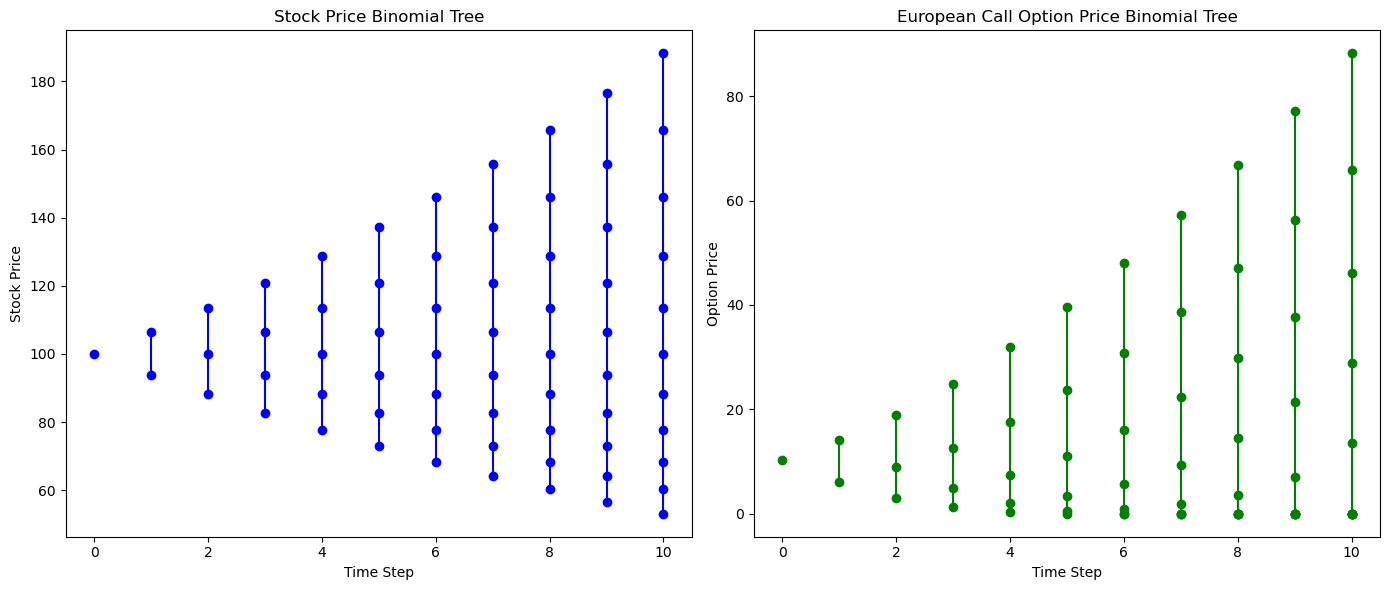

European Call Binomial Option Price: 10.25


In [114]:
def european_call_binomial_with_tree(S0, K, T, r, sigma, n):
    dt = T / n  # Time step
    u = np.exp(sigma * np.sqrt(dt))  # Up factor
    d = 1 / u  # Down factor
    p = (np.exp(r * dt) - d) / (u - d)  # Risk-neutral probability
    
    # Creating binomial tree for stock prices
    stock_tree = np.zeros((n+1, n+1))
    for j in range(n+1):
        for i in range(j+1):
            stock_tree[i, j] = S0 * u**i * d**(j-i)
    
    # Create binomial tree for option values at maturity
    option_tree = np.zeros((n+1, n+1))
    for j in range(n+1):
        option_tree[j, n] = max(0, stock_tree[j, n] - K)  # Payoff at maturity (European call)
    
    # Work backwards through the tree
    for i in range(n-1, -1, -1):
        for j in range(i+1):
            option_tree[j, i] = np.exp(-r * dt) * (p * option_tree[j+1, i+1] + (1-p) * option_tree[j, i+1])
    
    return stock_tree, option_tree, option_tree[0, 0]

# Get the stock and option trees
stock_tree, option_tree, call_price = european_call_binomial_with_tree(S0, K, T, r, sigma, n)

# Plotting the Stock Price Tree
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Stock price tree
ax[0].set_title("Stock Price Binomial Tree")
for j in range(n+1):
    ax[0].plot(np.repeat(j, j+1), stock_tree[:j+1, j], marker='o', linestyle='-', color='b')
ax[0].set_xlabel("Time Step")
ax[0].set_ylabel("Stock Price")

# Option price tree
ax[1].set_title("European Call Option Price Binomial Tree")
for j in range(n+1):
    ax[1].plot(np.repeat(j, j+1), option_tree[:j+1, j], marker='o', linestyle='-', color='g')
ax[1].set_xlabel("Time Step")
ax[1].set_ylabel("Option Price")

plt.tight_layout()
plt.show()

print(f"European Call Binomial Option Price: {call_price:.2f}")

This code generates two plots:

1. Stock Price Binomial Tree: Shows how the stock price evolves across time steps.
2. European Call Option Price Binomial Tree: Shows how the option price evolves, calculated from the risk-neutral probabilities.

## American Call

In [117]:
def american_call_binomial(S0, K, T, r, sigma, n):
    dt = T / n
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)

    option_american_call = np.zeros((n+1, n+1))
    for i in range(n+1):
        option_american_call[i, n] = max(0, S0 * u**i * d**(n-i) - K)

    for j in range(n-1, -1, -1):
        for i in range(j+1):
            hold_value = np.exp(-r * dt) *(p * option_american_call[i+1, j+1] + (1 - p) * option_american_call[i, j+1])
            exercise_value = max(0, S0 * u**i * d **(j-i) -K)
            option_american_call[i, j] = max(hold_value, exercise_value)
            
    return option_american_call[0, 0]
american_call_price = american_call_binomial(S0, K, T, r, sigma, n)
print(f"American Call Binomial Option Price: {american_call_price:.2f}")

American Call Binomial Option Price: 10.25


## American Call Binomial trees Plots

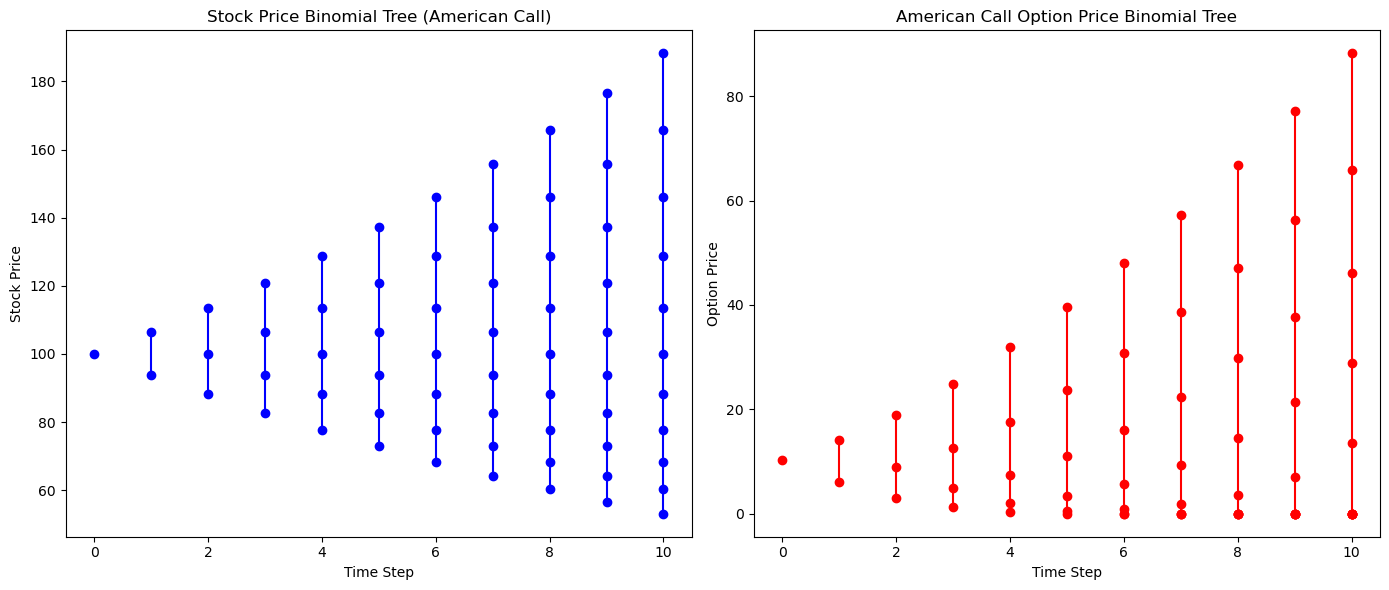

American Call Binomial Option Price: 10.25


In [132]:
def american_call_binomial_with_tree(S0, K, T, r, sigma, n):
    dt = T / n  # Time step
    u = np.exp(sigma * np.sqrt(dt))  # Up factor
    d = 1 / u  # Down factor
    p = (np.exp(r * dt) - d) / (u - d)  # Risk-neutral probability
    
    # Create binomial tree for stock prices
    stock_tree = np.zeros((n+1, n+1))
    for j in range(n+1):
        for i in range(j+1):
            stock_tree[i, j] = S0 * u**i * d**(j-i)
    
    # Create binomial tree for option values at maturity
    option_tree = np.zeros((n+1, n+1))
    for j in range(n+1):
        option_tree[j, n] = max(0, stock_tree[j, n] - K)  # Payoff at maturity (American call)
    
    # Work backwards through the tree
    for i in range(n-1, -1, -1):
        for j in range(i+1):
            hold_value = np.exp(-r * dt) * (p * option_tree[j+1, i+1] + (1-p) * option_tree[j, i+1])  # Continuation value
            exercise_value = max(0, stock_tree[j, i] - K)  # Intrinsic value (immediate exercise)
            option_tree[j, i] = max(hold_value, exercise_value)  # Take the maximum of holding and exercising
    
    return stock_tree, option_tree, option_tree[0, 0]

stock_tree_american, option_tree_american, american_call_price = american_call_binomial_with_tree(S0, K, T, r, sigma, n)

# Plotting the Stock Price Tree for American Call
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Stock price tree
ax[0].set_title("Stock Price Binomial Tree (American Call)")
for j in range(n+1):
    ax[0].plot(np.repeat(j, j+1), stock_tree_american[:j+1, j], marker='o', linestyle='-', color='b')
ax[0].set_xlabel("Time Step")
ax[0].set_ylabel("Stock Price")

# Option price tree for American call
ax[1].set_title("American Call Option Price Binomial Tree")
for j in range(n+1):
    ax[1].plot(np.repeat(j, j+1), option_tree_american[:j+1, j], marker='o', linestyle='-', color='r')
ax[1].set_xlabel("Time Step")
ax[1].set_ylabel("Option Price")

plt.tight_layout()
plt.show()

print(f"American Call Binomial Option Price: {american_call_price:.2f}")


This code generates:

1. Stock Price Binomial Tree for American Call: Similar to the European case but using early exercise.
2. American Call Option Price Binomial Tree: This tree shows how the option's price evolves, considering the possibility of early exercise at each node.